<a href="https://colab.research.google.com/github/priya329dwivedi/inser1/blob/master/Air_Pollution_Analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Pollution Analysis 

In [ ]:
# Import useful libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd 

In [ ]:
pip install geopandas


     |████████████████████████████████| 1.0MB 4.0MB/s 
     |████████████████████████████████| 15.3MB 267kB/s 
     |████████████████████████████████| 6.5MB 33.2MB/s 
     |████████████████████████████████| 92kB 8.2MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


In [ ]:
import pandas as pd 
from google.colab import files 


In [ ]:
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv("data.csv", encoding = "ISO-8859-1")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d') # date parse
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[df['year']>0]

In [ ]:
df.shape

(435735, 14)

In [ ]:
df.dtypes.value_counts()

object            7
float64           5
datetime64[ns]    1
int64             1
dtype: int64

In [ ]:
df.isnull().sum()

stn_code                       144074
sampling_date                       0
state                               0
location                            0
agency                         149478
type                             5390
so2                             34643
no2                             16230
rspm                            40219
spm                            237380
location_monitoring_station     27488
pm2_5                          426421
date                                0
year                                0
dtype: int64

In [ ]:
printNullValues(df)

                              Total    Percent
pm2_5                        426421  97.862462
spm                          237380  54.478066
agency                       149478  34.304795
stn_code                     144074  33.064592
rspm                          40219   9.230151
so2                           34643   7.950474
location_monitoring_station   27488   6.308421
no2                           16230   3.724741
type                           5390   1.236990
----------------------------------------------


### Affected Sectors 

In [ ]:
df["type"].value_counts()

Residential, Rural and other Areas    179013
Industrial Area                        96089
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8979
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

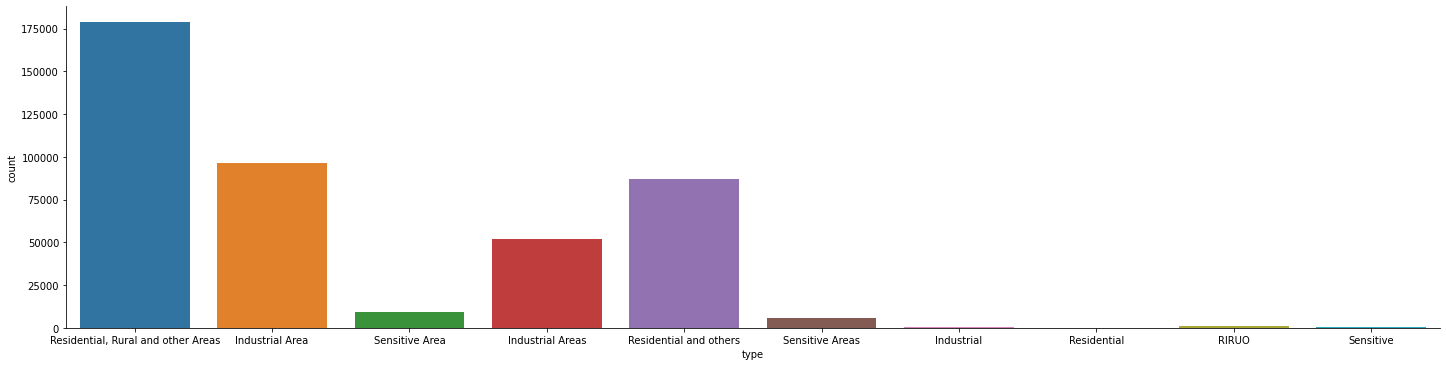

In [ ]:
sns.catplot(x = "type", kind = "count",  data = df, height=5, aspect = 4)

* As We can see in the Histogram Analysis, Residential and Rural Areas are worst affected by Pollution.

## Sectors wise using different Pollutants

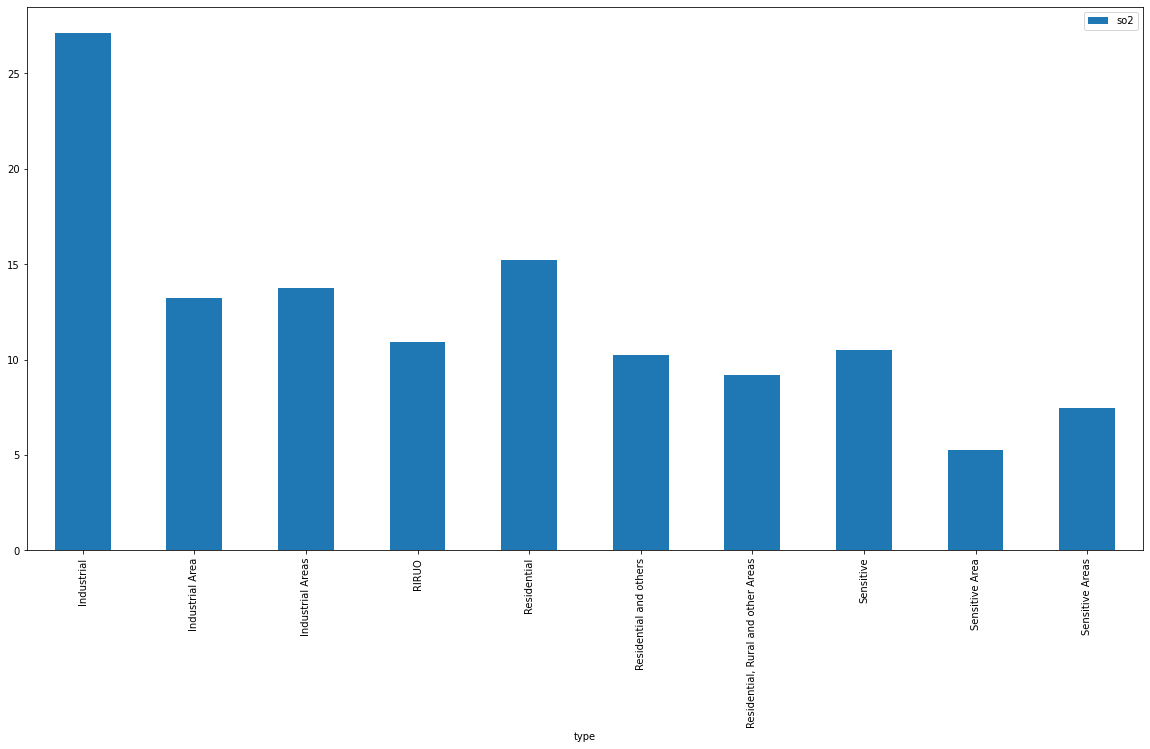

In [ ]:
grp = df.groupby(["type"]).mean()["so2"].to_frame()
grp.plot.bar(figsize = (20,10))

###                                                                                          NO2

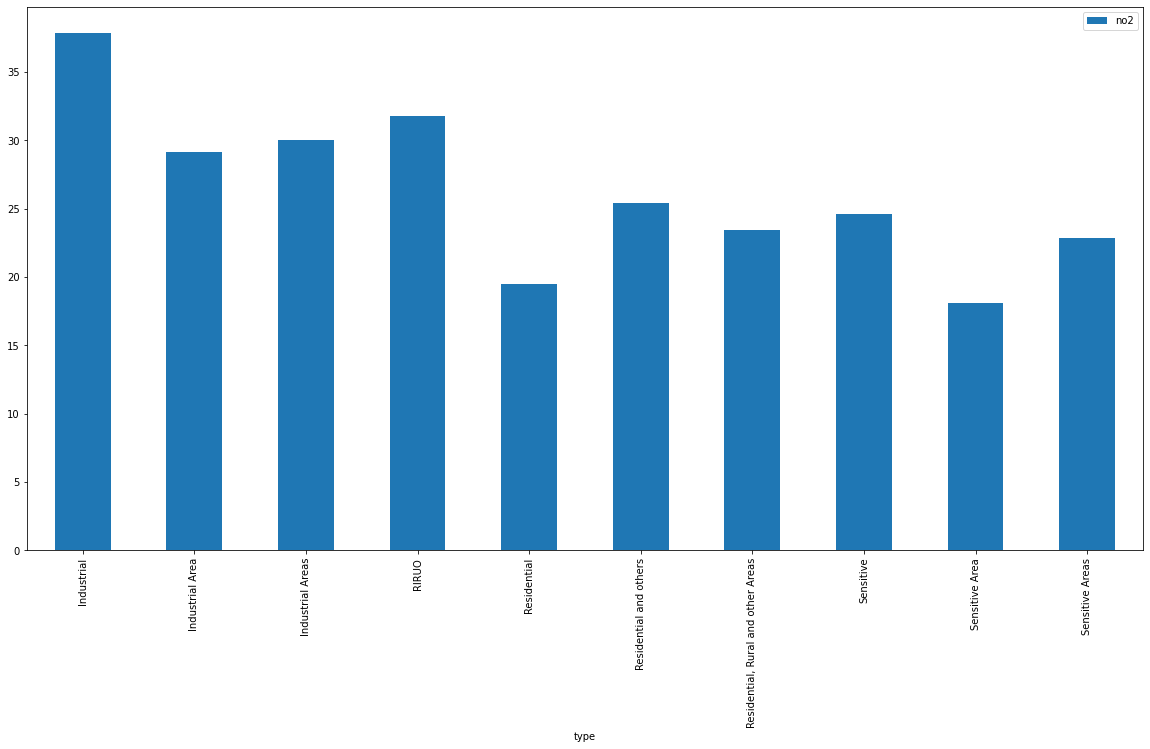

In [ ]:
grp = df.groupby(["type"]).mean()["no2"].to_frame()

grp.plot.bar(figsize = (20,10))

## State Wise Analysis for different Pollutants

### SO2 ( Sulfur dioxide )

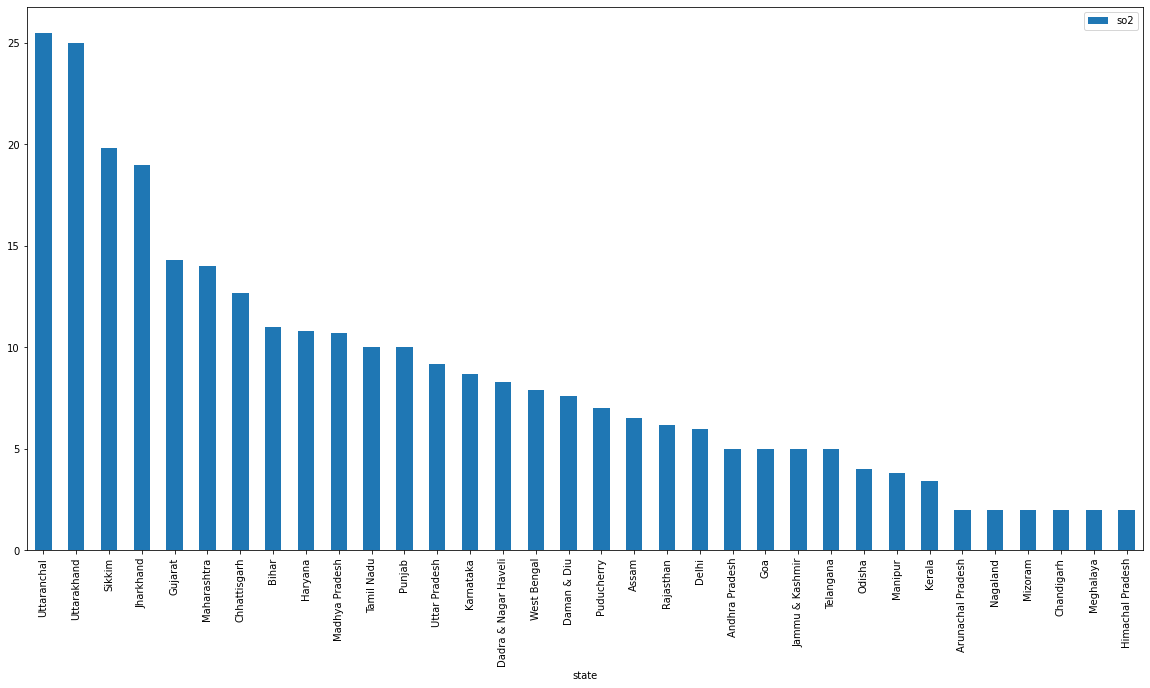

In [ ]:
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar(figsize=(20,10))

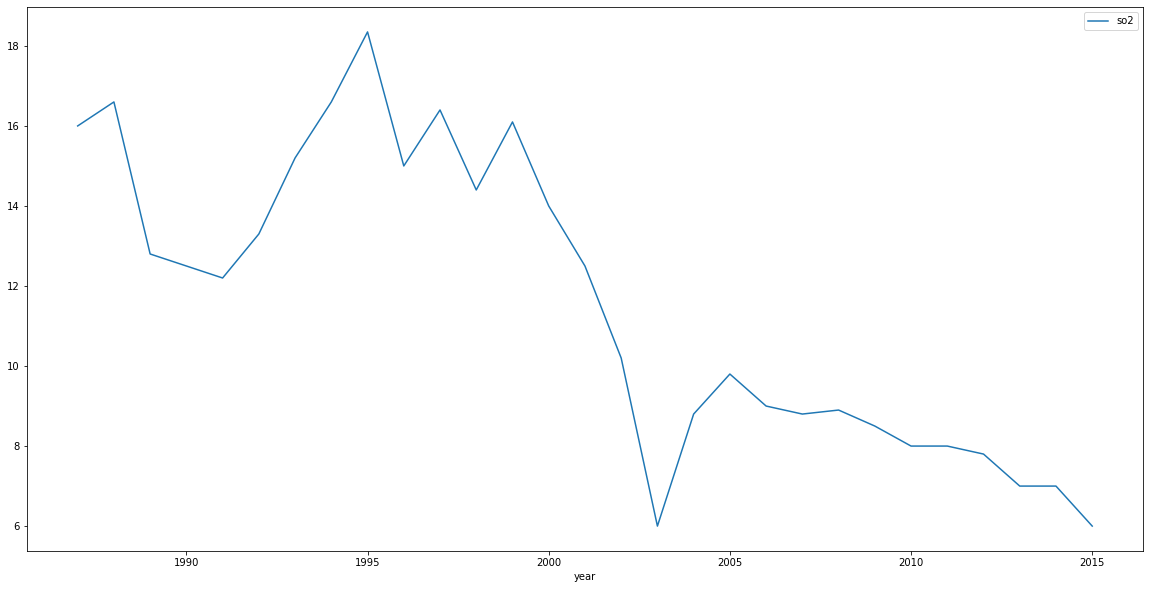

In [ ]:
df[['so2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

### NO2 ( Nitrogen dioxide )

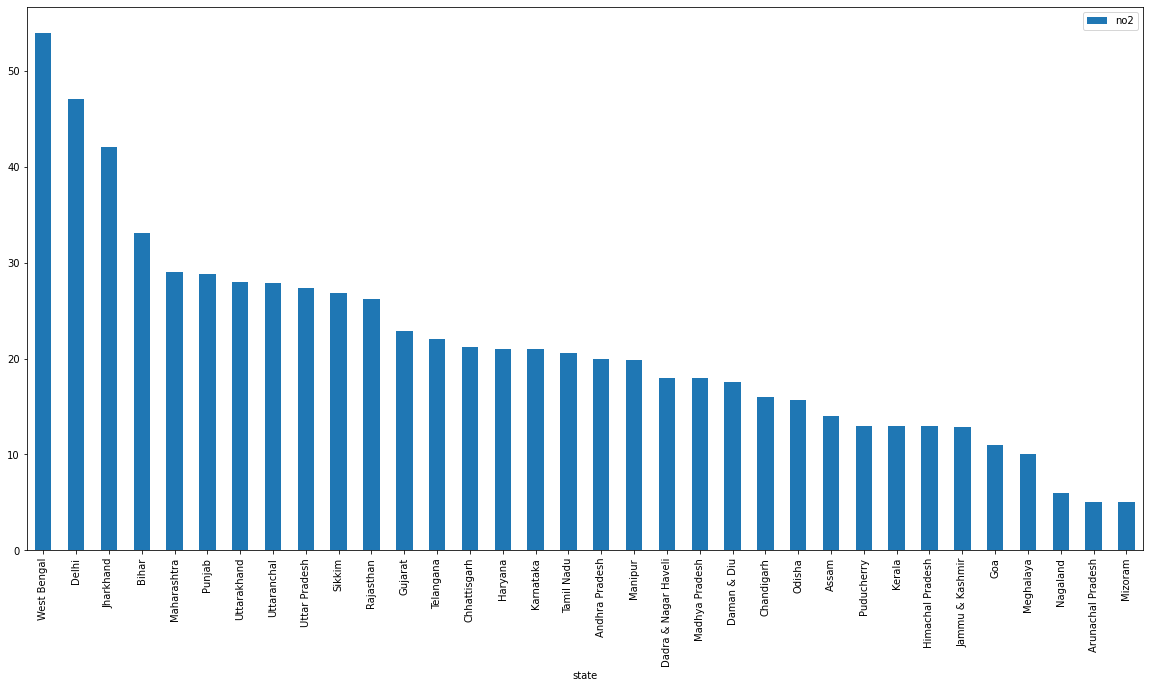

In [ ]:
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(figsize=(20,10))

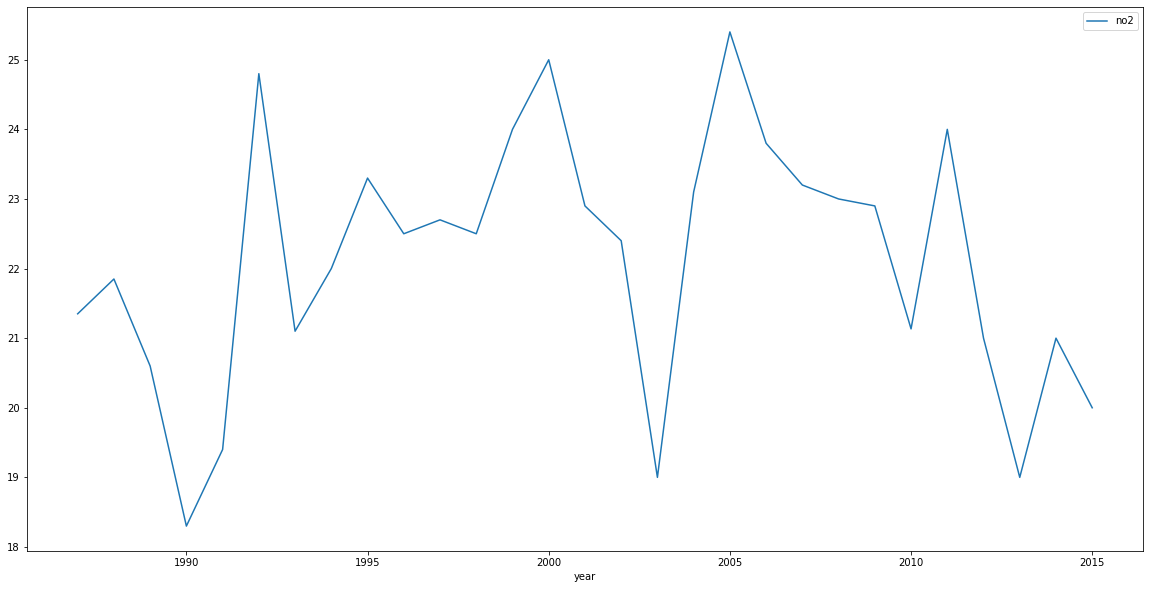

In [ ]:

df[['no2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

### SPM ( Suspended Particulate Matter )

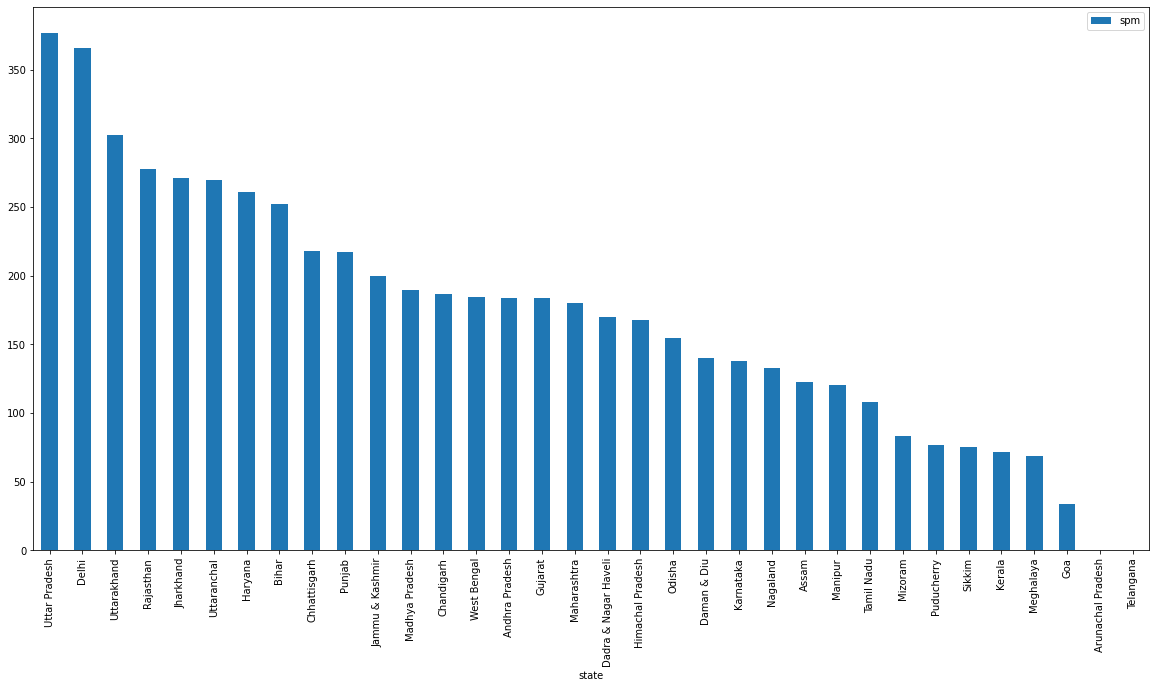

In [ ]:

df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(figsize=(20,10))


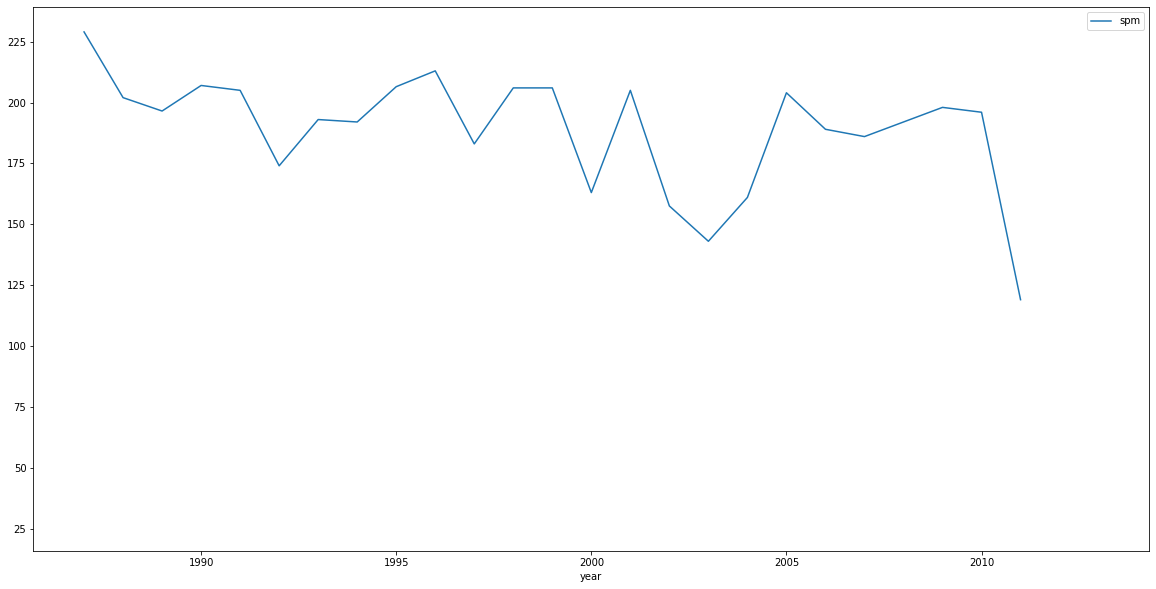

In [ ]:
df[['spm','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

## State vs Year Analysis for different Pollutants

### SO2

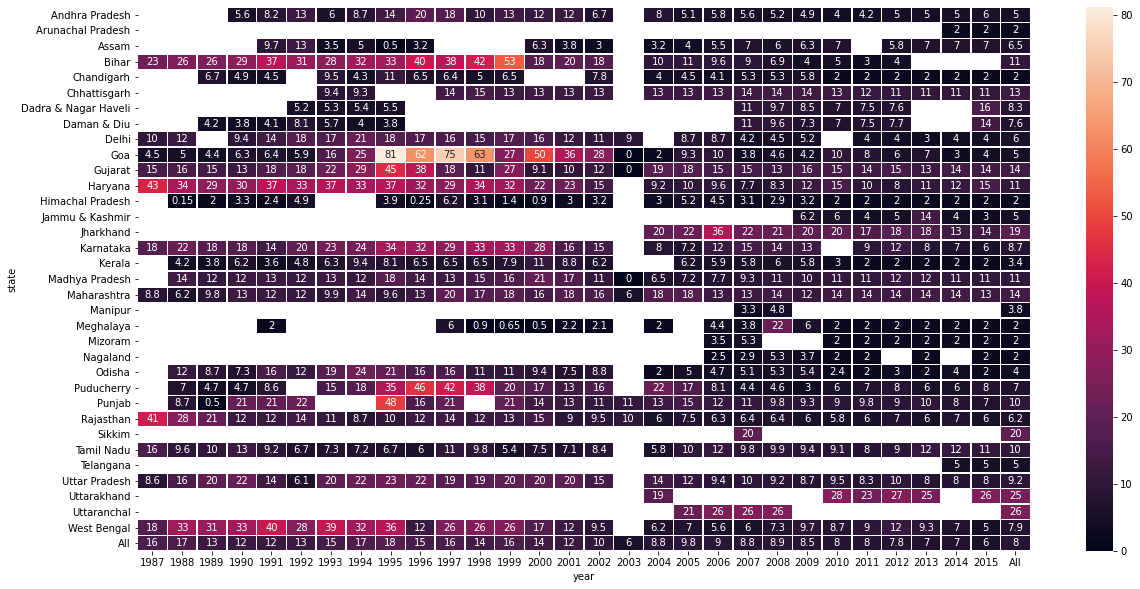

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(df.pivot_table('so2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

### NO2

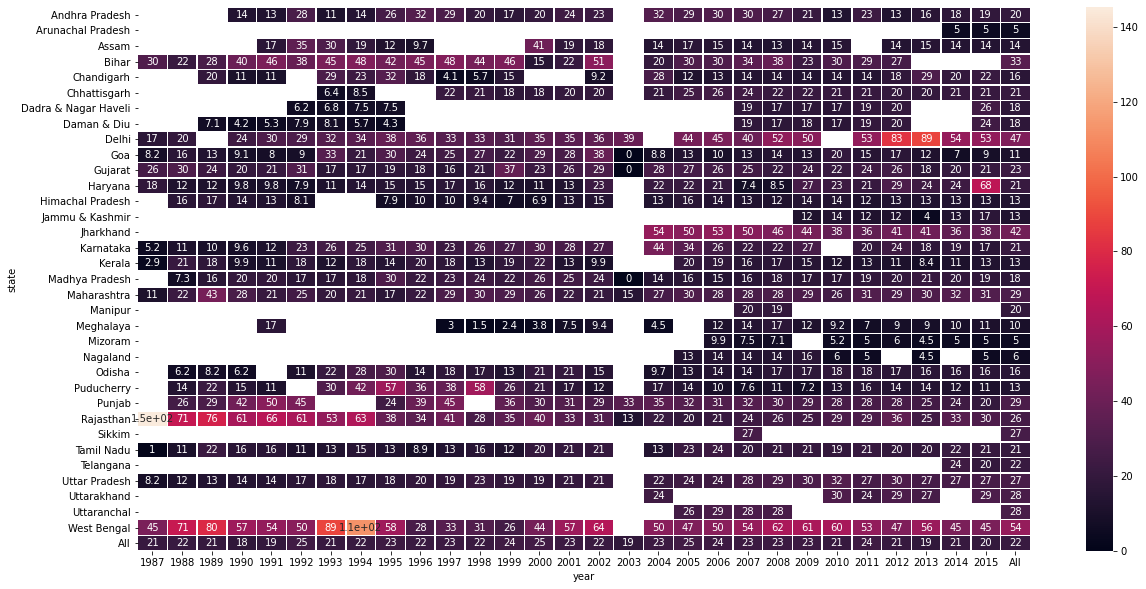

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(df.pivot_table('no2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

### SPM

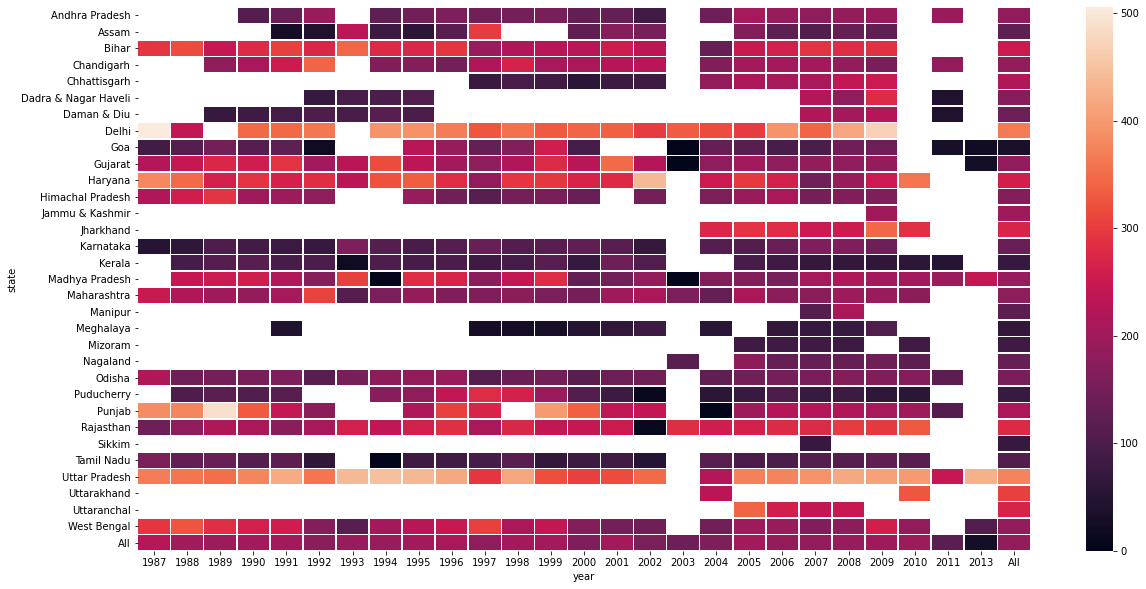

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(df.pivot_table('spm', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=False, linewidths=.5)

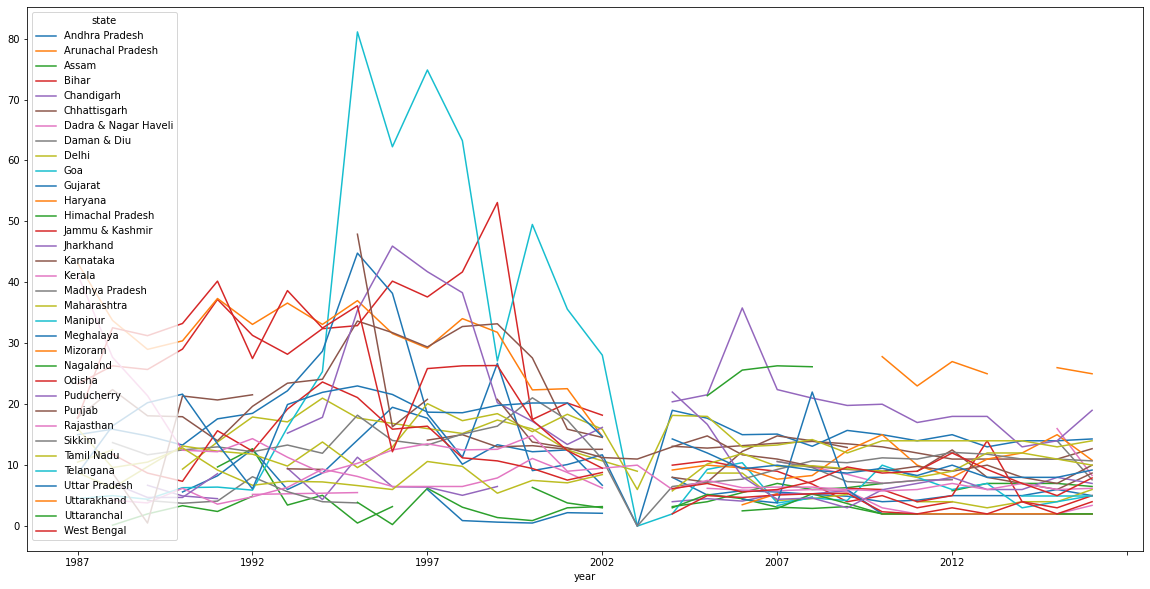

In [ ]:
Year wise and States Wise Graph

### NO2

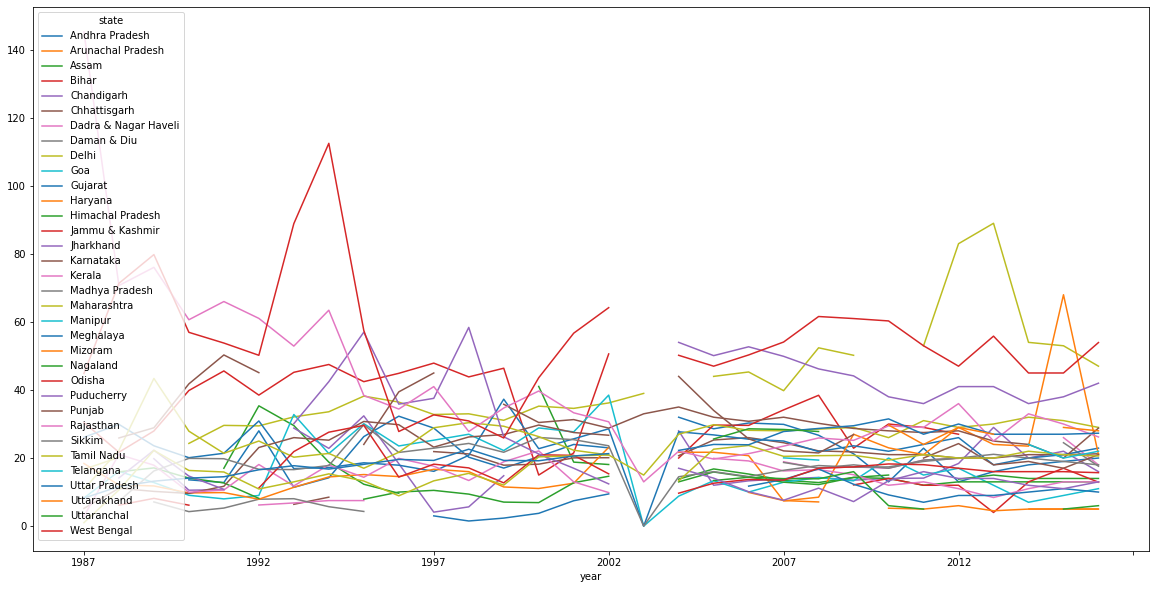

In [ ]:
temp = df.pivot_table('no2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

### SPM

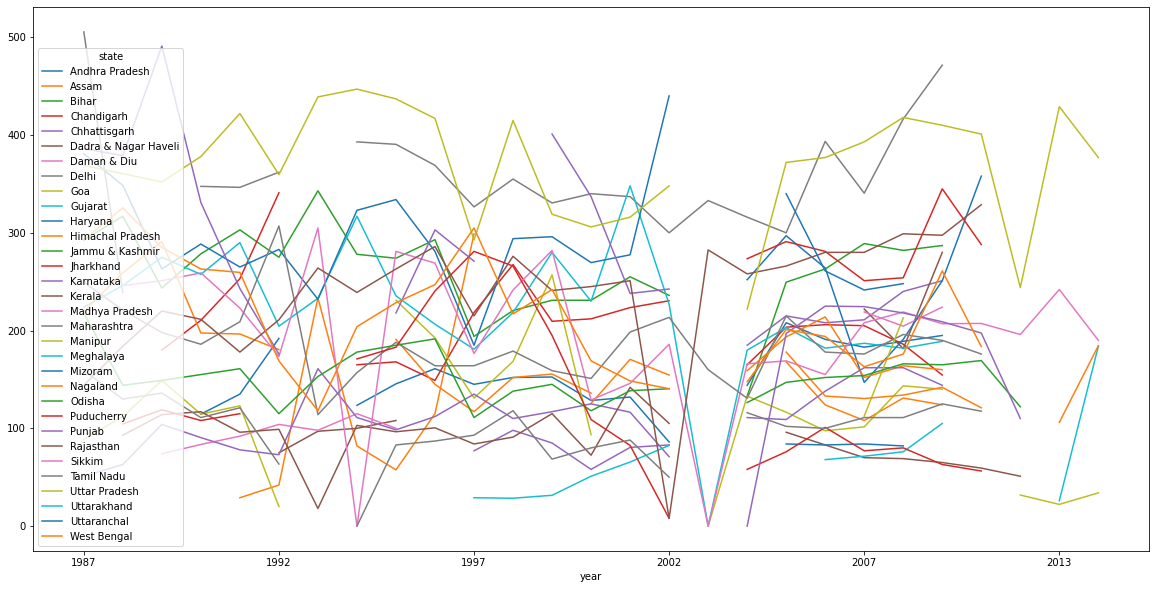

In [ ]:
temp = df.pivot_table('spm', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

In [ ]:
upload = files.upload()

Saving Indian_States.dbf to Indian_States.dbf
Saving Indian_States.prj to Indian_States.prj
Saving Indian_States.shp to Indian_States.shp
Saving Indian_States.shx to Indian_States.shx


In [ ]:
!pip install sentinelsat
!pip install geopandas
!pip install folium

     |████████████████████████████████| 51kB 1.8MB/s 


In [ ]:
import geopandas as gpd
import folium 
from sentinelsat import SentinelAPI


In [ ]:
india = gpd.read_file(r"Indian_States.shp")
india.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   st_nm     36 non-null     object  
 1   geometry  36 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 704.0+ bytes


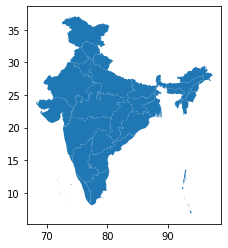

In [ ]:
india.plot()

In [ ]:
# Matching the names of states between the two datasets

india["st_nm"] = india["st_nm"].apply(lambda x: x.lower())
india = india.set_index("st_nm")
df["state"] = df["state"].apply(lambda x: x.lower())

### Splitting Data in Before and After 2001 for Analysis 

In [ ]:
df_before_2001 = df[df["year"] < 2001]
df_before_2001 = df_before_2001.groupby("state").mean()
df_before_2001.head()

,so2,no2,rspm,spm,pm2_5,year
state,,,,,,
andhra pradesh,15.482984,27.839704,NaN,172.423448,NaN,1995.969734
assam,8.169036,29.712755,NaN,89.886486,NaN,1993.823529
bihar,35.394125,38.599094,NaN,299.216621,NaN,1994.644416
chandigarh,7.741951,17.974146,NaN,224.910156,NaN,1994.370909
chhattisgarh,13.270732,17.060976,NaN,83.090909,NaN,1997.682927


In [ ]:
df_after_2001 = df[df["year"] >= 2001]
df_after_2001 = df_after_2001.groupby("state").mean()

### SO2

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]


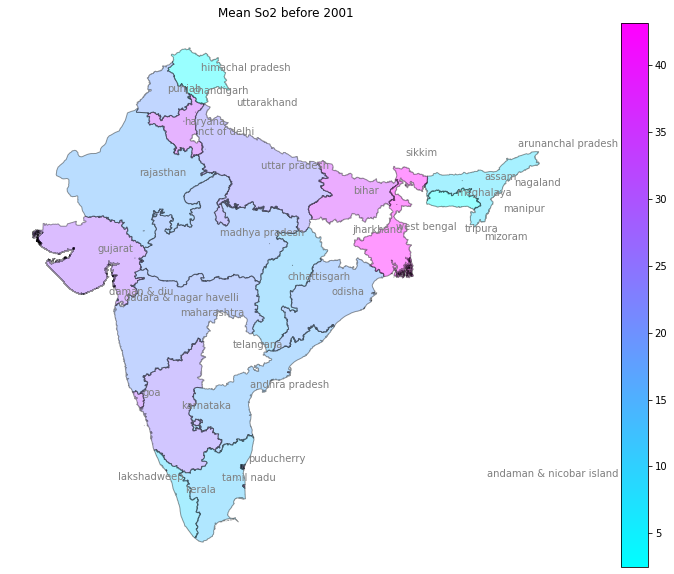

In [ ]:
result = pd.concat([df_before_2001, india], axis=1, sort=False)
result = result [result["geometry"] != None]

from geopandas import GeoDataFrame
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(result, crs=crs, geometry=result ["geometry"])
gdf['centroid'] = gdf.geometry.centroid
fig,ax = plt.subplots(figsize=(20,10))
gdf.plot(column='so2',ax=ax,alpha=0.4,edgecolor='black',cmap='cool', legend=True)
plt.title("Mean So2 before 2001")
plt.axis('off')

for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf.index):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points",color='gray')

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]


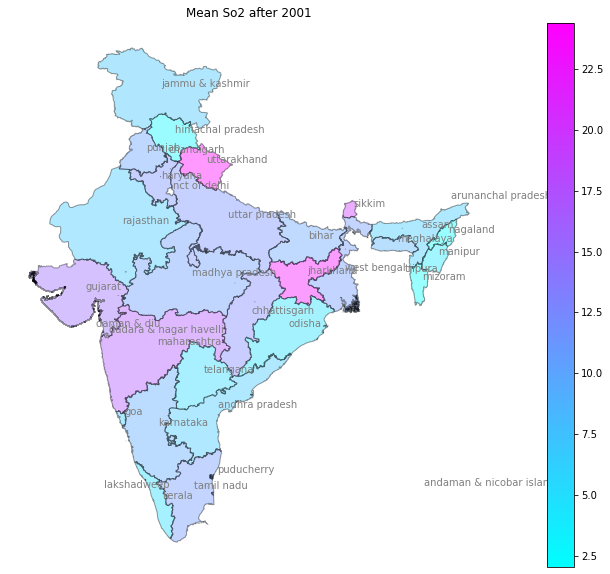

In [ ]:
result = pd.concat([df_after_2001, india], axis=1, sort=False)
result = result [result["geometry"] != None]

from geopandas import GeoDataFrame
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(result, crs=crs, geometry=result ["geometry"])
gdf['centroid'] = gdf.geometry.centroid
fig,ax = plt.subplots(figsize=(20,10))
gdf.plot(column='so2',ax=ax,alpha=0.4,edgecolor='black',cmap='cool', legend=True)
plt.title("Mean So2 after 2001")
plt.axis('off')

for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf.index):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points",color='gray')

### NO2

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]


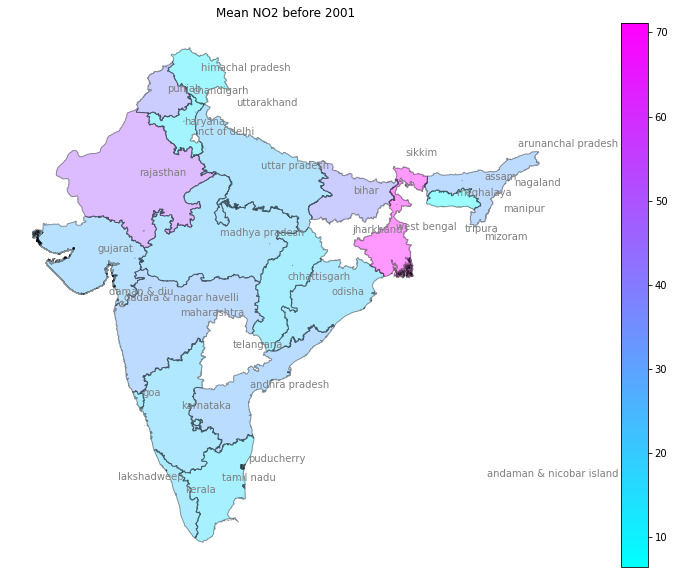

In [ ]:
result = pd.concat([df_before_2001, india], axis=1, sort=False)
result = result [result["geometry"] != None]

from geopandas import GeoDataFrame
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(result, crs=crs, geometry=result ["geometry"])
gdf['centroid'] = gdf.geometry.centroid
fig,ax = plt.subplots(figsize=(20,10))
gdf.plot(column='no2',ax=ax,alpha=0.4,edgecolor='black',cmap='cool', legend=True)
plt.title("Mean NO2 before 2001")
plt.axis('off')

for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf.index):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points",color='gray')

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


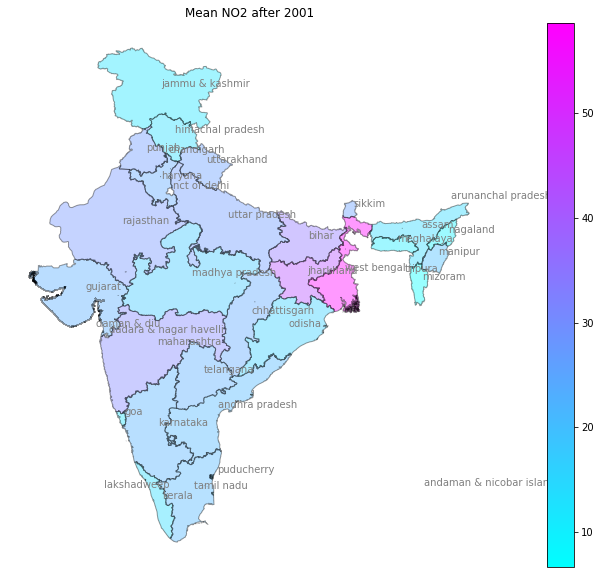

In [ ]:
result = pd.concat([df_after_2001, india], axis=1, sort=False)
result = result [result["geometry"] != None]


from geopandas import GeoDataFrame
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(result, crs=crs, geometry=result ["geometry"])
gdf['centroid'] = gdf.geometry.centroid
fig,ax = plt.subplots(figsize=(20,10))
gdf.plot(column='no2',ax=ax,alpha=0.4,edgecolor='black',cmap='cool', legend=True)
plt.title("Mean NO2 after 2001")
plt.axis('off')

for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf.index):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points",color='gray')

# Time Series Analysis for Long-term Air Pollution Levels and changes.

### SO2 ( Sulfur dioxide )

In [ ]:
uploaded1 = files.upload()

Saving meanAQI.csv to meanAQI.csv


In [ ]:
AQIdf = pd.read_csv("meanAQI.csv")
AQIdf['date'] = pd.to_datetime(AQIdf['date'],format='%Y-%m-%d') # date parse
AQIdf.head()

,date,AQI
0,1987-01-31,242.438652
1,1987-02-28,235.787929
2,1987-03-31,294.558772
3,1987-04-30,202.012681
4,1987-05-31,307.991667


In [ ]:
AQIdf.isna().sum()

date    0
AQI     0
dtype: int64

In [ ]:
AQIdf=AQIdf.set_index('date')
AQIdf.reset_index()
AQIdf.resample(rule="M")
AQIdf.head()

,AQI
date,
1987-01-31,242.438652
1987-02-28,235.787929
1987-03-31,294.558772
1987-04-30,202.012681
1987-05-31,307.991667


In [ ]:
AQIdf.index

DatetimeIndex(['1987-01-31', '1987-02-28', '1987-03-31', '1987-04-30',
               '1987-05-31', '1987-06-30', '1987-07-31', '1987-08-31',
               '1987-09-30', '1987-10-31',
               ...
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=346, freq=None)

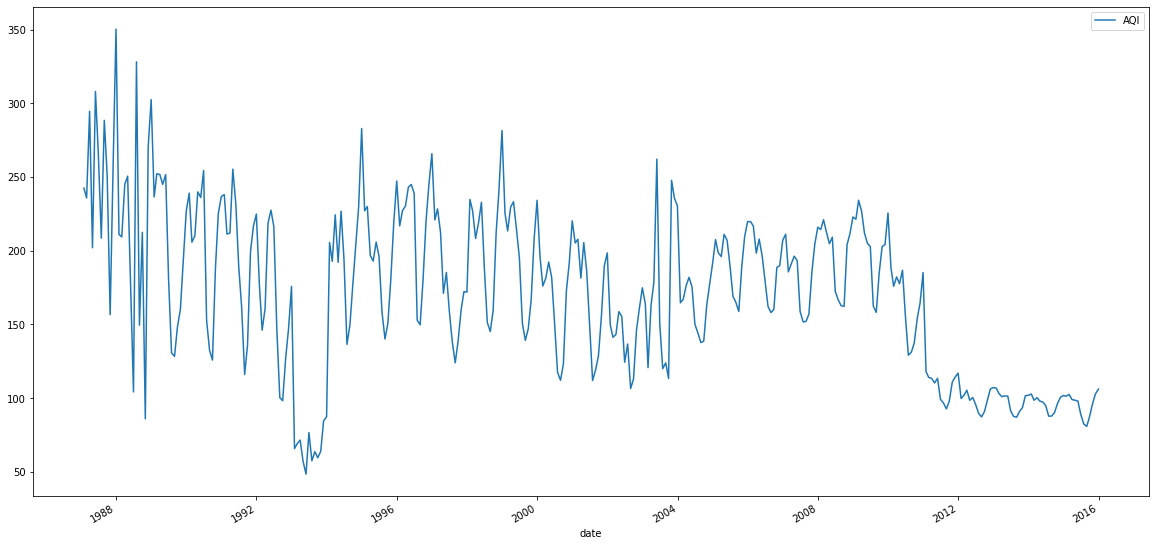

In [ ]:
AQIdf.plot(figsize = (20,10))

Using Exponentially Weighted Moving Average (EWMA) for SO2

In [ ]:
AQIdf["EWMA_8"] = AQIdf["AQI"].ewm(span=8).mean()

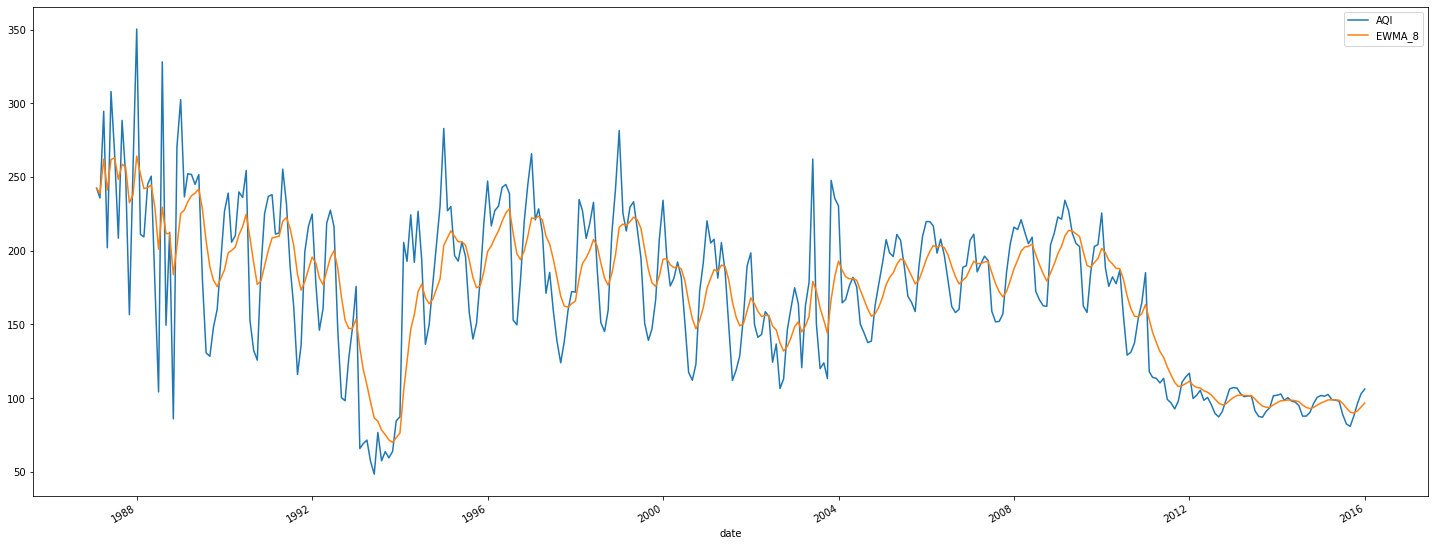

In [ ]:
AQIdf.plot(figsize = (25,10))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(AQIdf["AQI"], model = "multiplicative",period=8) 

TypeError: ignored

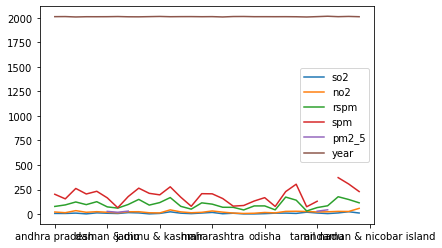

In [ ]:
fig = result.plot()

## Using ARIMA and Seasonal ARIMA Model


In [ ]:
import multiprocessing as mp
from multiprocessing import Pool
import time 

In [ ]:
pool = mp.Pool(mp.cpu_count())

In [ ]:
start=time.time()
p = Pool(1)

p.map(ADF_Test, df)
end= time.time()
print(end-start)

Process ForkPoolWorker-49:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()


KeyboardInterrupt: ignored

  File "/usr/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [ ]:
df.shape

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ADF_Test(df):
    result = adfuller(df)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
import time 

In [ ]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150,February - M021990,andhra pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990
1,151,February - M021990,andhra pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990
2,152,February - M021990,andhra pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990
3,150,March - M031990,andhra pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990
4,151,March - M031990,andhra pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435734,SAMP,15-12-15,west bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15,2015
435735,SAMP,18-12-15,west bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18,2015
435736,SAMP,21-12-15,west bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21,2015
435737,SAMP,24-12-15,west bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24,2015


In [ ]:
import random

In [ ]:
ADF_Test(AQIdf['AQI'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.816782252313728
p-value : 0.05591624170682754
#Lags Used : 14
Number of Observations Used : 331
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
AQIdf['AQI_First_Diff']=AQIdf['AQI']-AQIdf['AQI'].shift(8)
AQIdf=AQIdf.dropna()
AQIdf.head()

,AQI,EWMA_8,AQI_First_Diff
date,,,
1987-09-30,250.979167,256.759055,8.540514
1987-10-31,156.625000,232.545421,-79.162929
1987-11-30,255.034091,237.878971,-39.524681
1987-12-31,350.375000,264.166380,148.362319
1988-01-31,211.076502,251.901111,-96.915165


In [ ]:
ADF_Test(AQIdf['AQI_First_Diff'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.866730278982998
p-value : 4.04652169846649e-05
#Lags Used : 17
Number of Observations Used : 320
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


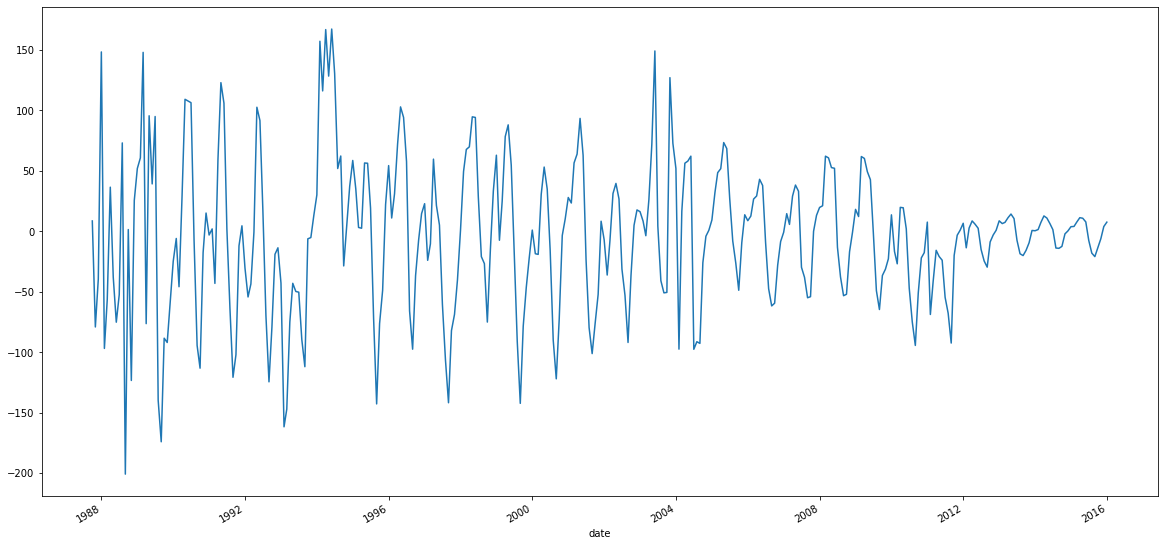

In [ ]:
AQIdf["AQI_First_Diff"].plot(figsize = (20,10))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

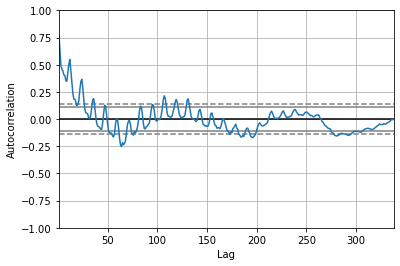

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(AQIdf['AQI'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
## p(number of months till shut-off)=3, d(how many times difference)=1, q(exponential decrease till)=2

C:\Users\rajne\anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


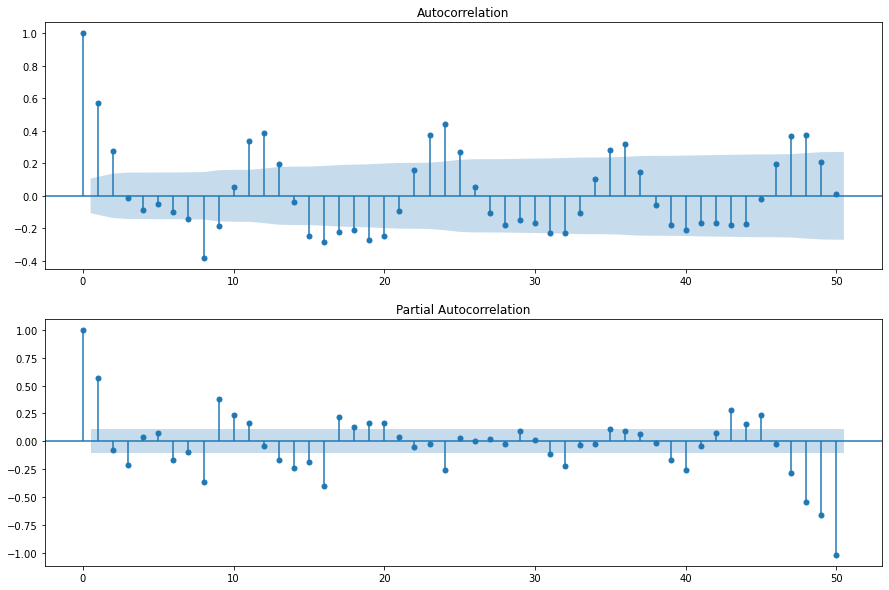

In [ ]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(AQIdf["AQI_First_Diff"],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(AQIdf["AQI_First_Diff"],lags=50,ax=ax2)

## Using the ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
AQIdf.index = pd.DatetimeIndex(AQIdf.index).to_period('M')

In [ ]:
model=ARIMA(AQIdf['AQI'],order=(3,1,2))
model_fit=model.fit()

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                  338
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1660.464
Date:                Sun, 07 Feb 2021   AIC                           3332.928
Time:                        10:43:01   BIC                           3355.849
Sample:                    09-30-1987   HQIC                          3342.064
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2901      0.207      1.403      0.161      -0.115       0.696
ar.L2          0.1661      0.127      1.306      0.192      -0.083       0.415
ar.L3         -0.1833      0.043     -4.277      0.0

<AxesSubplot:xlabel='date'>

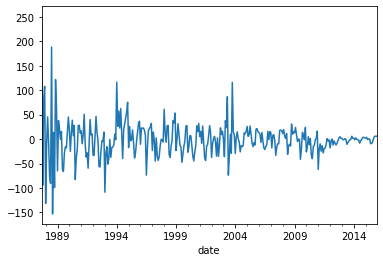

In [ ]:
print(model_fit.summary())
model_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

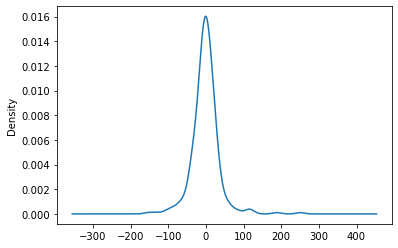

In [ ]:
model_fit.resid.plot(kind='kde')

#### Checking with known data 

<AxesSubplot:xlabel='date'>

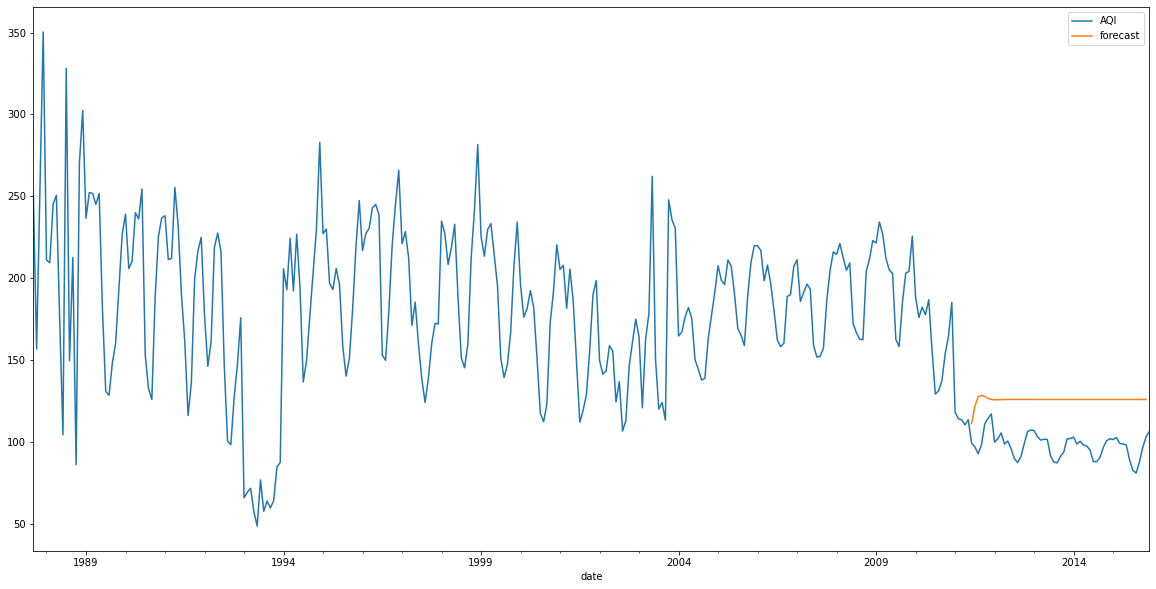

In [ ]:
AQIdf['forecast'] = model_fit.predict(start = 285, end= 338, dynamic= True)  
AQIdf[['AQI','forecast']].plot(figsize=(20,10))

* As We can See from above graph ARIMA Model does not give good results, so we  should try Seasonal ARIMA

## Using the Seasonal ARIMA model

C:\Users\rajne\anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                               AQI   No. Observations:                  338
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 8)   Log Likelihood               -1617.176
Date:                           Sun, 07 Feb 2021   AIC                           3256.352
Time:                                   10:43:06   BIC                           3298.108
Sample:                               09-30-1987   HQIC                          3273.010
                                    - 12-31-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2550      0.469      2.678      0.007       0.336       2.174
ar.L2         -0.3336      0.186     -1.794

<AxesSubplot:xlabel='date'>

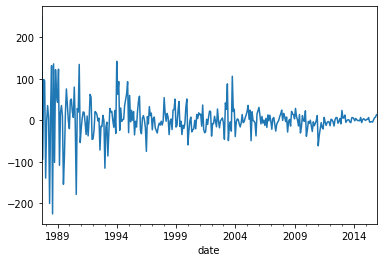

In [ ]:
import statsmodels.api as sm

seasonal_model = sm.tsa.statespace.SARIMAX(AQIdf["AQI"],order=(3,1,2), seasonal_order=(3,1,2,8))
results = seasonal_model.fit()
print(results.summary())
results.resid.plot()

<AxesSubplot:ylabel='Density'>

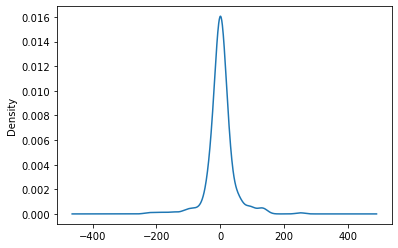

In [ ]:
results.resid.plot(kind='kde')

#### Check with known data 

<AxesSubplot:xlabel='date'>

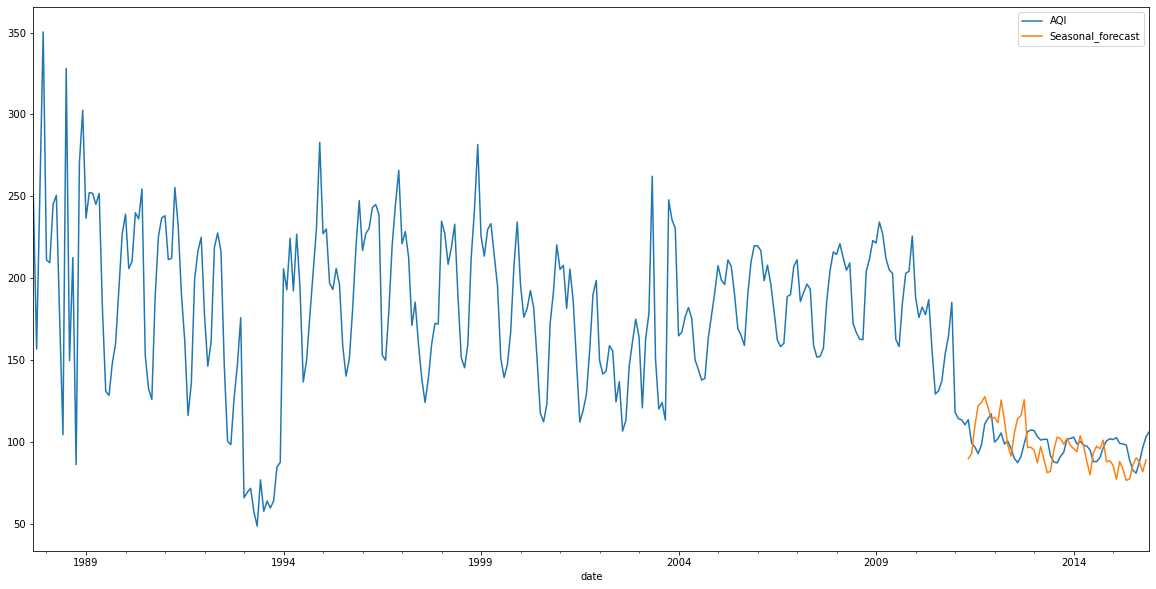

In [ ]:
AQIdf['Seasonal_forecast'] = results.predict(start = 284, end= 338, dynamic= True)  
AQIdf[['AQI','Seasonal_forecast']].plot(figsize=(20,10))   

* Using Seasonal ARIMA, We are getting Pretty Good Results!**

# Forecast

In [ ]:
AQIdf.index=AQIdf.index.to_timestamp() # date parse
AQIdf.reset_index()
AQIdf.resample(rule="M")
AQIdf.head()

,AQI,EWMA_8,AQI_First_Diff,forecast,Seasonal_forecast
date,,,,,
1987-09-01,250.979167,256.759055,8.540514,NaN,NaN
1987-10-01,156.625000,232.545421,-79.162929,NaN,NaN
1987-11-01,255.034091,237.878971,-39.524681,NaN,NaN
1987-12-01,350.375000,264.166380,148.362319,NaN,NaN
1988-01-01,211.076502,251.901111,-96.915165,NaN,NaN


In [ ]:
AQIdf.index.map(lambda t: t.replace(day=1))

DatetimeIndex(['1987-09-01', '1987-10-01', '1987-11-01', '1987-12-01',
               '1988-01-01', '1988-02-01', '1988-03-01', '1988-04-01',
               '1988-05-01', '1988-06-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='date', length=338, freq=None)

<AxesSubplot:>

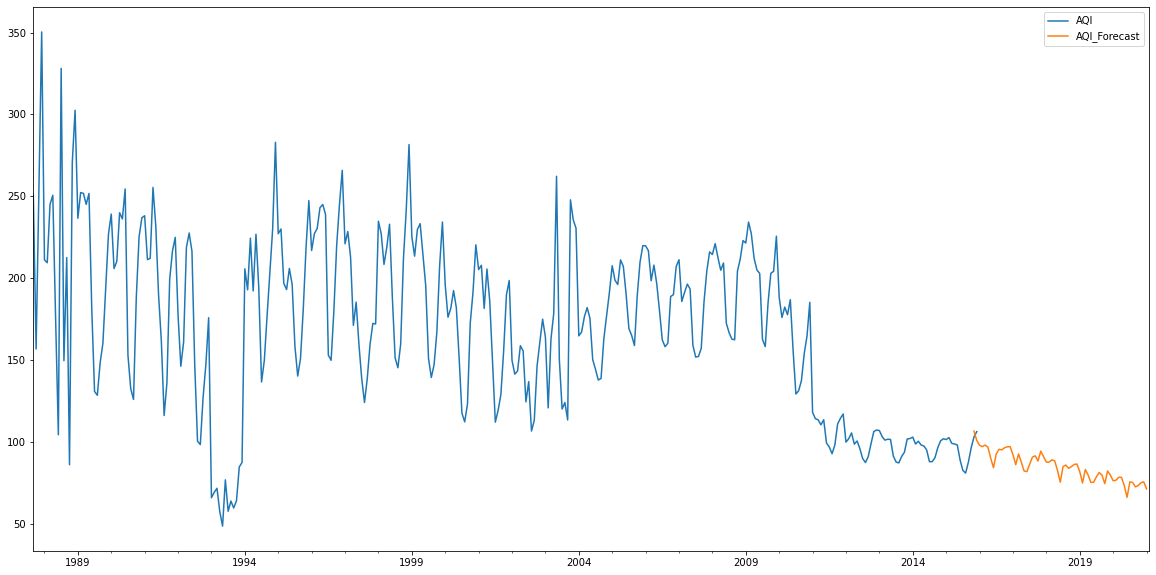

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [AQIdf.index[-1] + DateOffset(months=x) for x in range(0,63)]
future_AQIdf = pd.DataFrame(index=future_dates[1:],columns=AQIdf.columns)
Combined_AQIdf = pd.concat([AQIdf,future_AQIdf])
Combined_AQIdf.index = pd.DatetimeIndex(Combined_AQIdf.index).to_period('M')
Combined_AQIdf['AQI_Forecast'] = results.predict(start = 338, end = 400, dynamic= True)  
Combined_AQIdf[['AQI', 'AQI_Forecast']].plot(figsize=(20, 10)) 